7

In [15]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4, random_state=42)

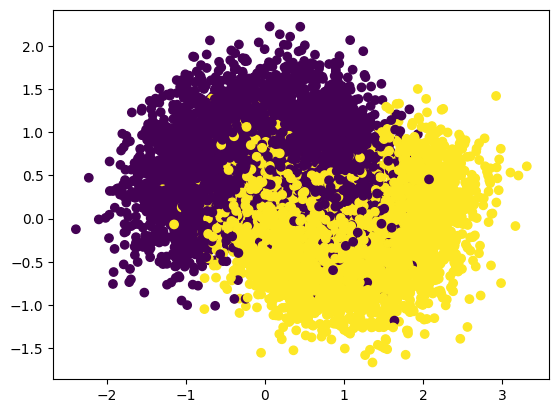

In [38]:
import matplotlib.pyplot as plt

X, y = moons

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}

grid_src = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    params,
    cv = 3
)

grid_src.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [52]:
grid_src.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=17, random_state=42)

In [53]:
from sklearn.metrics import accuracy_score

y_pred = grid_src.best_estimator_.predict(X_test)

acc = accuracy_score(y_test, y_pred)

acc


0.8595